In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# =========================================
# 1. IMPORT LIBRARIES
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For inline plots in Jupyter
%matplotlib inline

In [ ]:
cd drive/MyDrive/Geospatial Dashboard/

/content/drive/MyDrive/Geospatial Dashboard


In [ ]:
# =========================================
# 2. LOAD DATA
# =========================================
df = pd.read_csv("Crime_Incidents_in_2024_Cleaned.csv")

In [ ]:
display(df.head())

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,REPORT_DATE
0,396384.27,137427.7600,24054605,2024-04-12 14:24:15+00:00,day,others,theft f/auto,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,golden triangle,2024-04-12 06:33:00+00:00,2024-04-12 08:59:00+00:00,666213423,2024-04-12
1,395709.91,137490.9400,24056000,2024-04-14 23:56:40+00:00,evening,others,theft/other,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024-04-14 04:00:00+00:00,NaN,666213424,2024-04-14
2,397497.55,137053.1300,24056385,2024-04-15 17:42:57+00:00,day,others,theft/other,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,downtown,2024-04-15 14:31:00+00:00,2024-04-15 15:18:00+00:00,666213769,2024-04-15
3,400040.61,129046.4721,18060158,2024-07-30 04:00:00+00:00,midnight,gun,homicide,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018-04-15 16:07:00+00:00,2018-04-15 17:34:56+00:00,666236835,2024-07-30
4,397171.11,137408.2500,24013789,2024-01-28 07:33:28+00:00,midnight,others,theft/other,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,downtown,2024-01-28 06:41:00+00:00,2024-01-28 07:12:00+00:00,666239683,2024-01-28


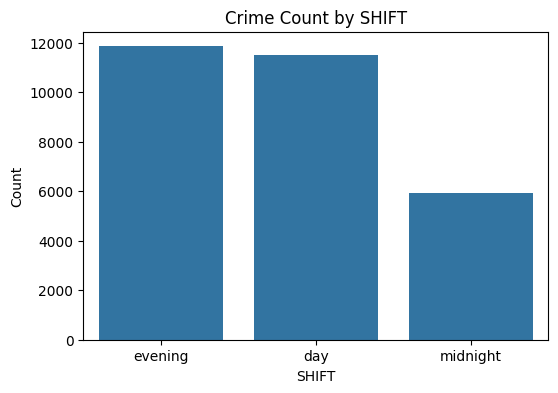

In [ ]:
# =========================================
# 1. UNIVARIATE ANALYSIS
# =========================================
# --- a. SHIFT distribution
if "SHIFT" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="SHIFT", data=df, order=df["SHIFT"].value_counts().index)
    plt.title("Crime Count by SHIFT")
    plt.xlabel("SHIFT")
    plt.ylabel("Count")
    plt.show()

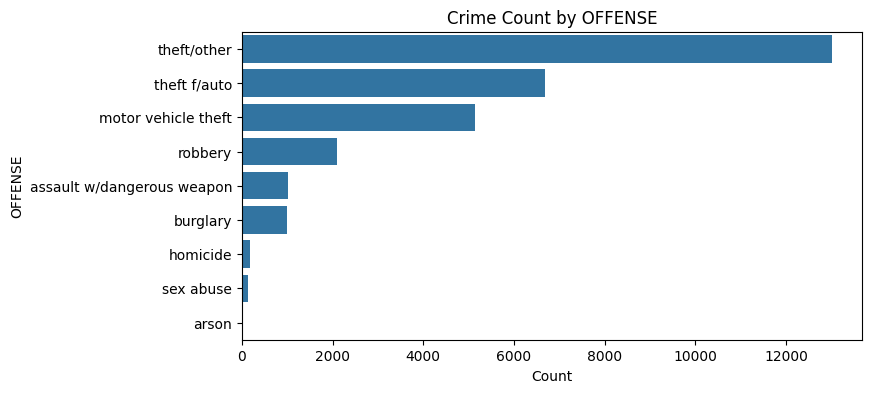

In [ ]:
# --- b. OFFENSE distribution
if "OFFENSE" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y="OFFENSE", data=df, order=df["OFFENSE"].value_counts().index)
    plt.title("Crime Count by OFFENSE")
    plt.xlabel("Count")
    plt.ylabel("OFFENSE")
    plt.show()

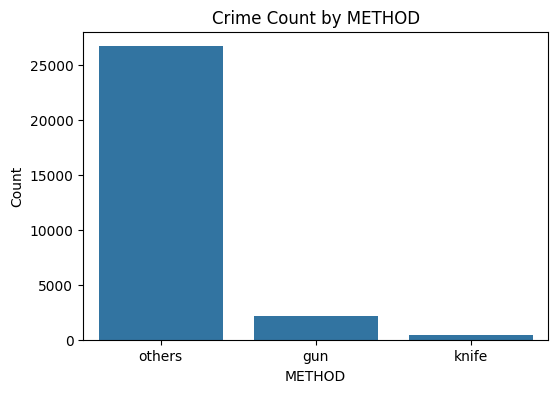

In [ ]:
# --- c. METHOD distribution
if "METHOD" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="METHOD", data=df, order=df["METHOD"].value_counts().index)
    plt.title("Crime Count by METHOD")
    plt.xlabel("METHOD")
    plt.ylabel("Count")
    plt.show()

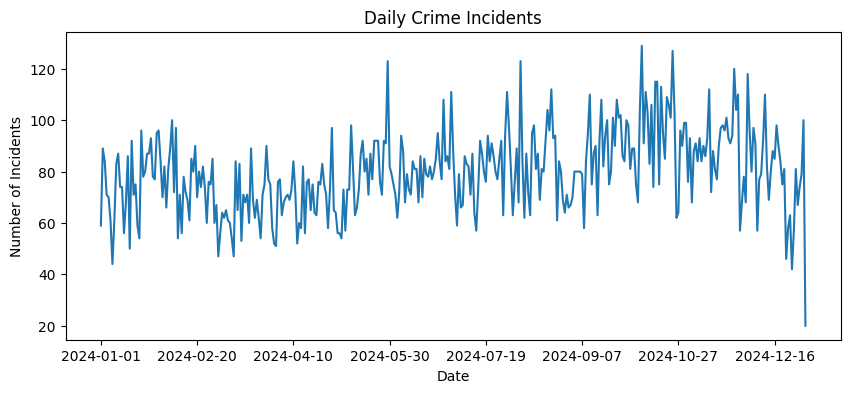

In [ ]:
# =========================================
# 2. TIME-BASED ANALYSIS
# =========================================
if "REPORT_DAT" in df.columns:

    # Plot daily crime count
    daily_counts = df.groupby("REPORT_DATE").size()
    plt.figure(figsize=(10,4))
    daily_counts.plot()
    plt.title("Daily Crime Incidents")
    plt.xlabel("Date")
    plt.ylabel("Number of Incidents")
    plt.show()

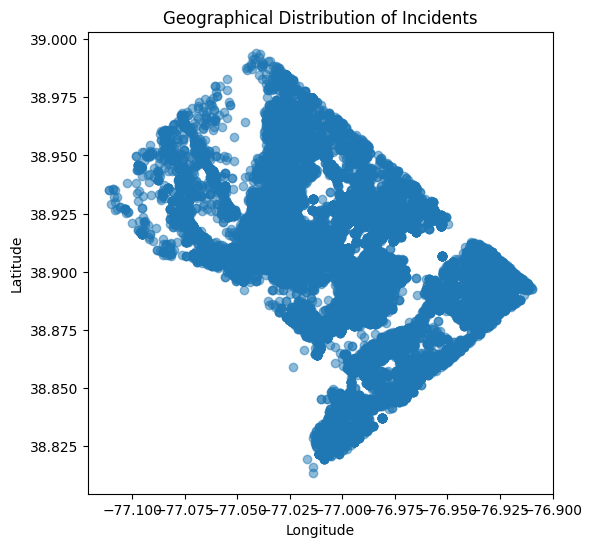

In [ ]:
# =========================================
# 3. LOCATION-BASED ANALYSIS
# =========================================
# --- 10a. Quick scatter plot of latitude & longitude
if "LATITUDE" in df.columns and "LONGITUDE" in df.columns:
    plt.figure(figsize=(6,6))
    plt.scatter(df["LONGITUDE"], df["LATITUDE"], alpha=0.5)
    plt.title("Geographical Distribution of Incidents")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

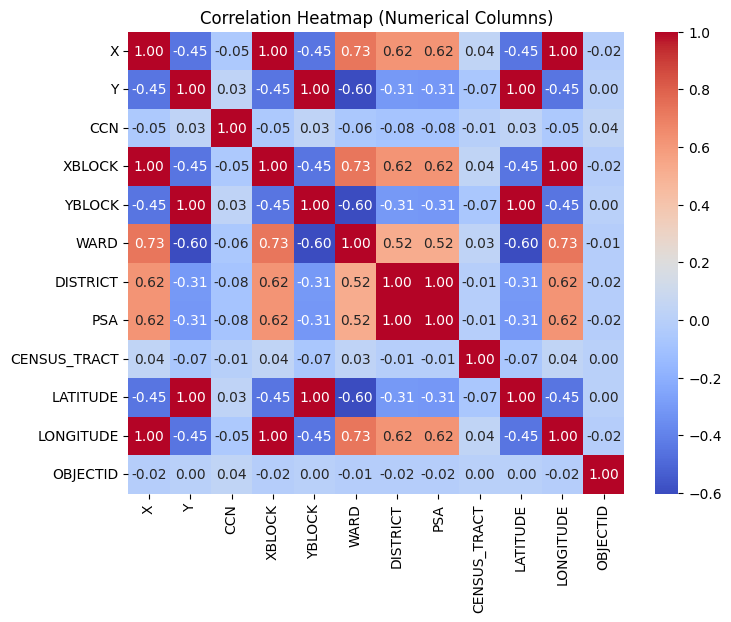

In [ ]:
# =========================================
# 4. CORRELATION & HEATMAP (NUMERIC FIELDS)
# =========================================
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Columns)")
plt.show()

In [ ]:

print("\nEDA Complete!")



EDA Complete!
